<a href="https://colab.research.google.com/github/Vinithpr2004/CODSOFT/blob/main/codsoft_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [88]:
#importing part
#train
tr_data=pd.read_csv("/content/train_data.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])
display(tr_data.head())
print(tr_data.shape)

#test
tst_data=pd.read_csv("/content/test_data.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])
display(tst_data.head())
print(tst_data.shape)

#test sol
tst_data_sol=pd.read_csv("/content/test_data_solution.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])
display(tst_data_sol.head())
print(tst_data_sol.shape)


<ipython-input-88-7ebf5c6e9171>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tr_data=pd.read_csv("/content/train_data.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


<ipython-input-88-7ebf5c6e9171>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tst_data=pd.read_csv("/content/test_data.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


(30438, 4)


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(32709, 4)


<ipython-input-88-7ebf5c6e9171>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tst_data_sol=pd.read_csv("/content/test_data_solution.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(33692, 4)


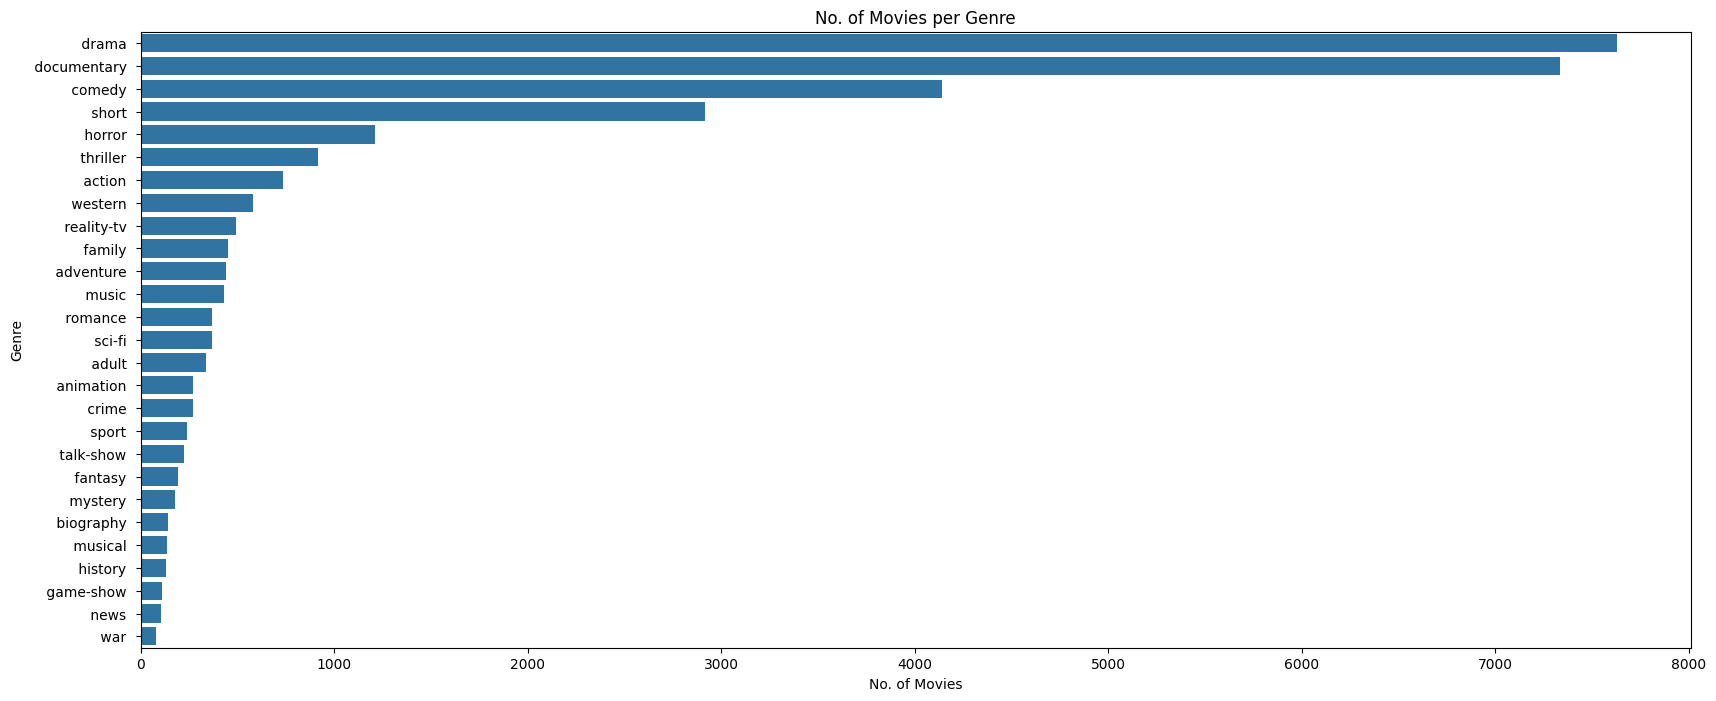

In [89]:
plt.figure(figsize=(20,8))
sns.countplot(y=tr_data['Genre'], order = tr_data['Genre'].value_counts().index)
plt.title('No. of Movies per Genre')
plt.xlabel('No. of Movies')
plt.ylabel('Genre')
plt.show()

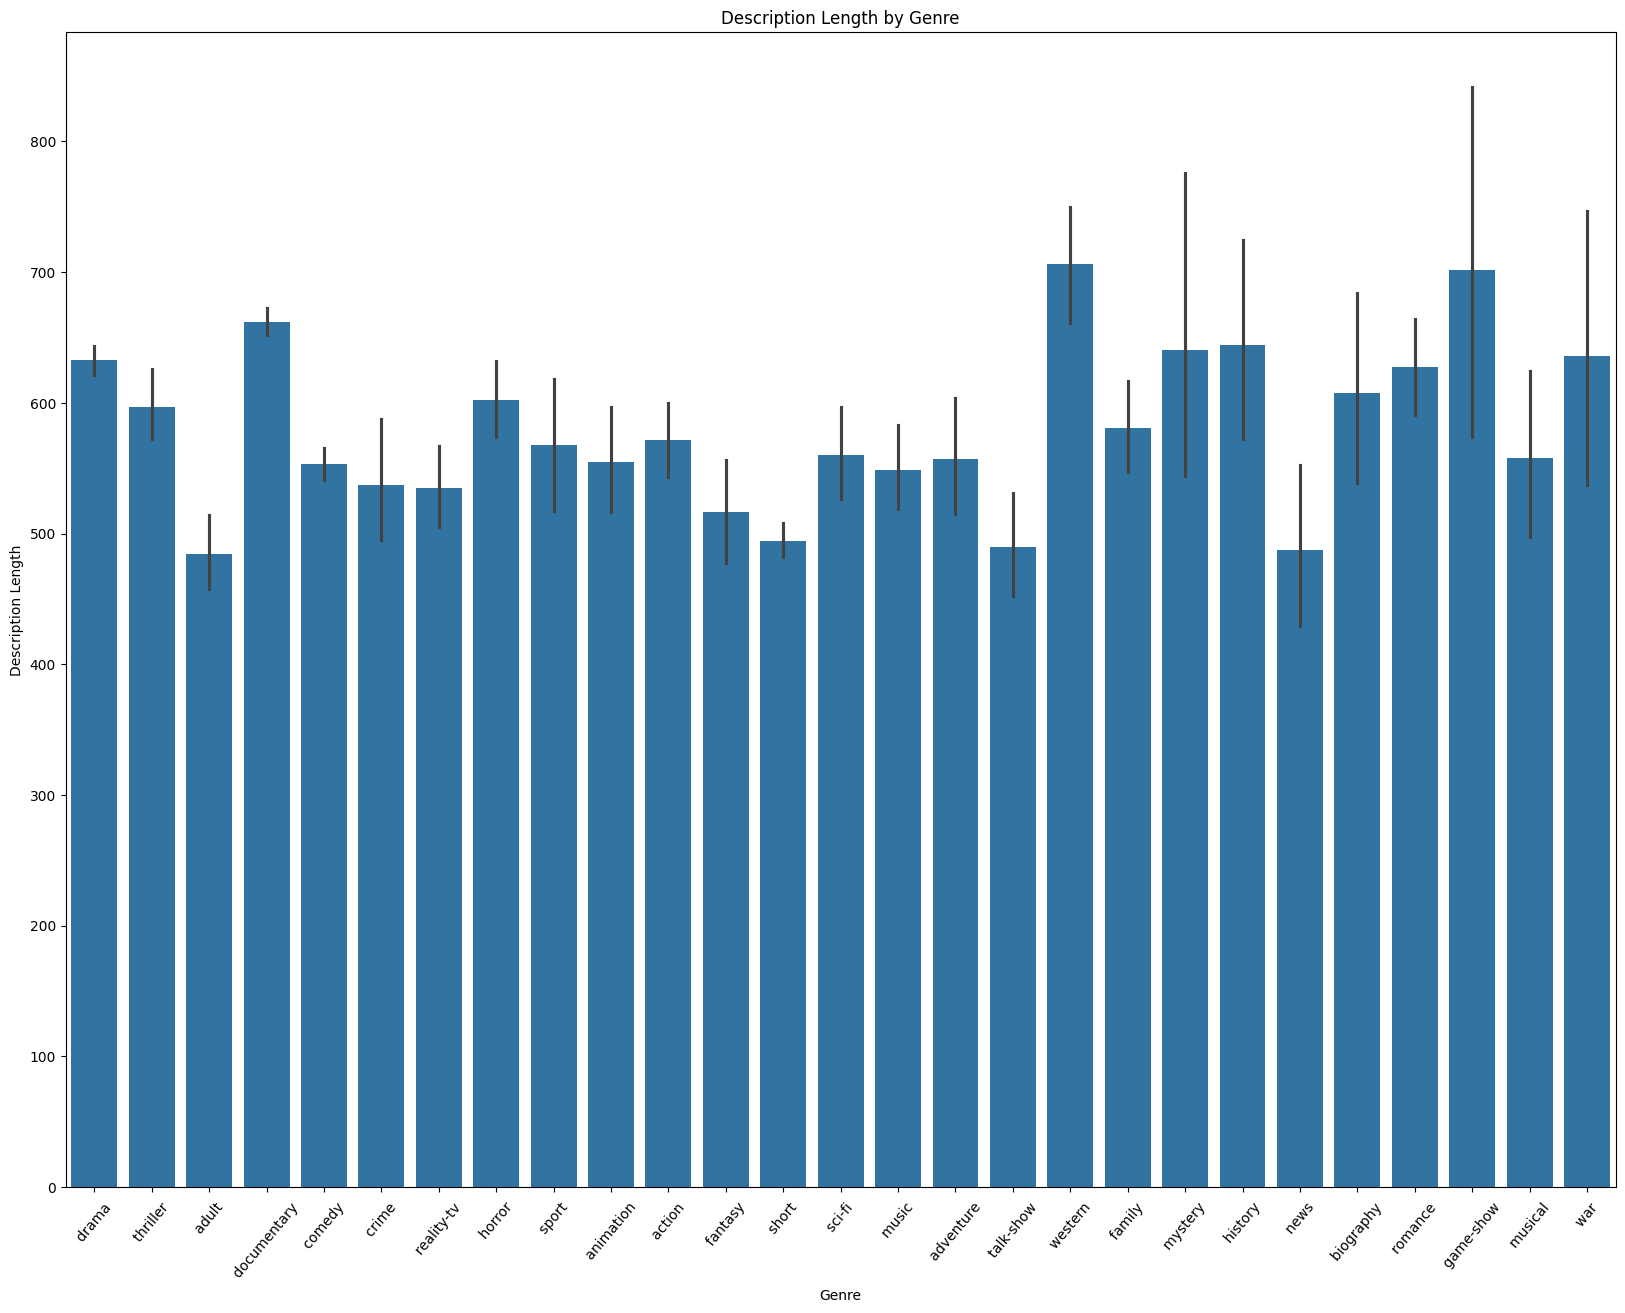

In [90]:
#genre Vs desc_length
tr_data['Desc_length'] = tr_data['Description'].apply(len)
plt.figure(figsize=(20, 15))
sns.barplot(x='Genre', y='Desc_length', data=tr_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=50)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()


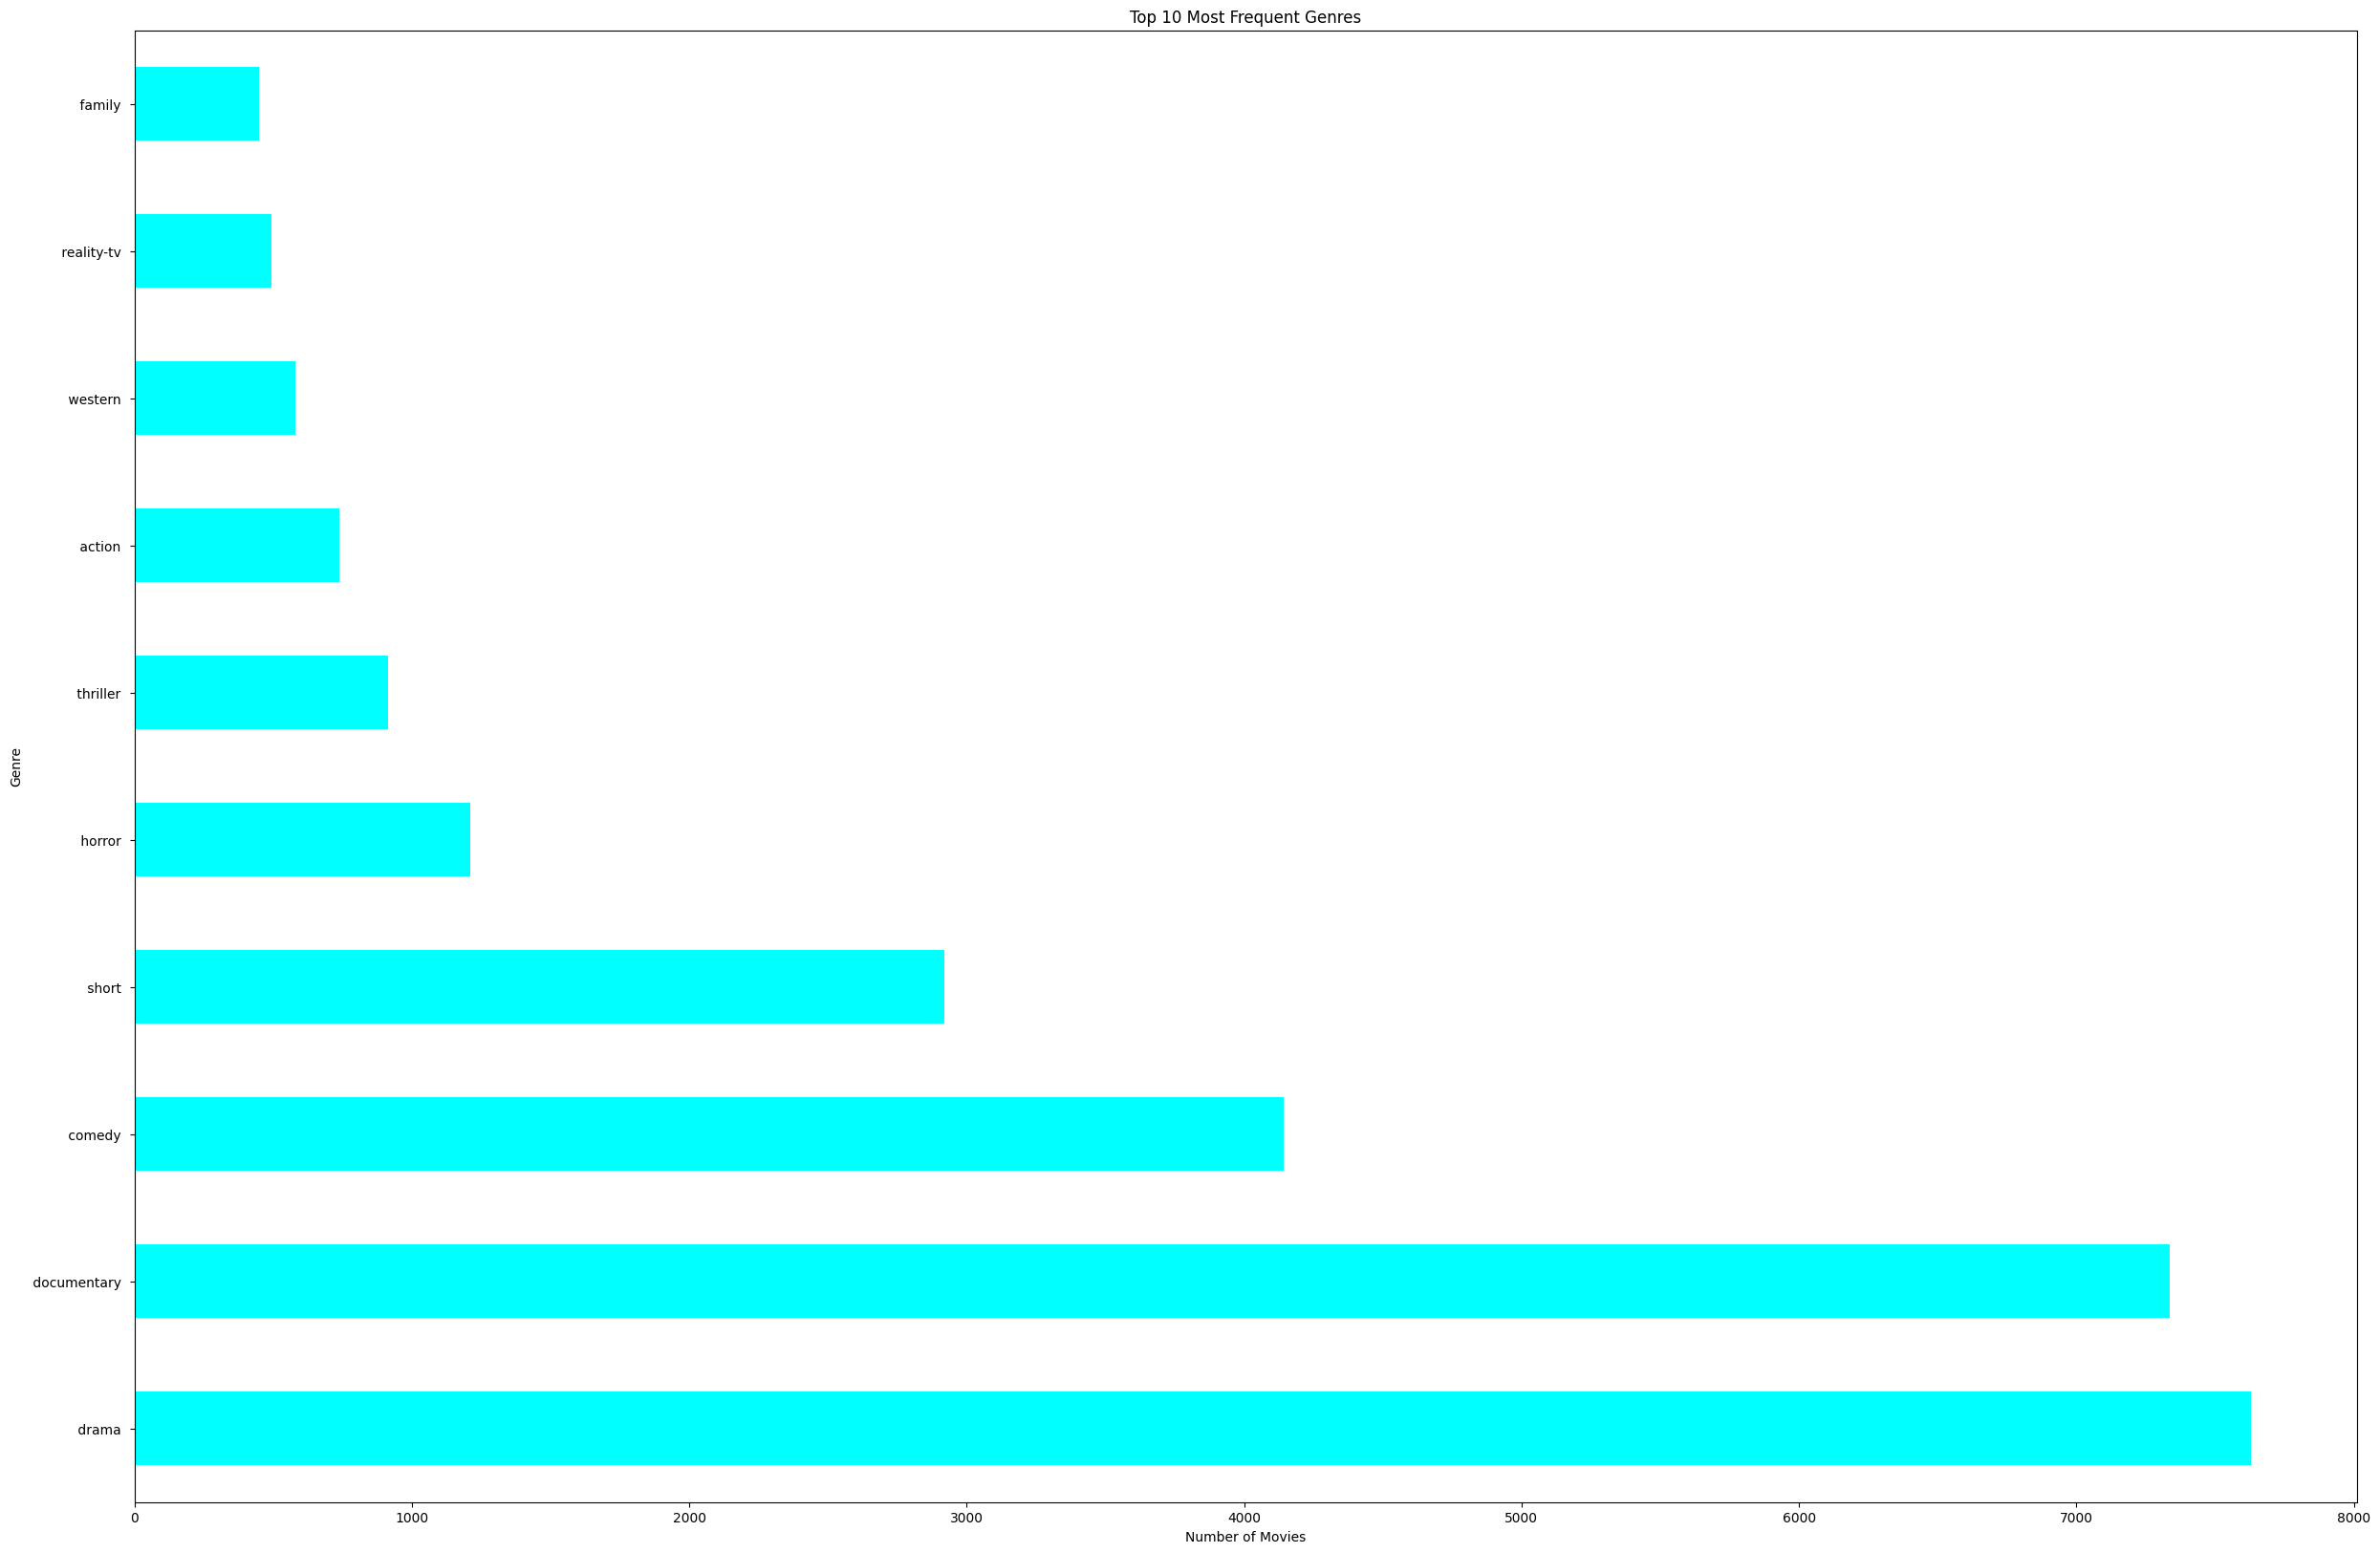

In [91]:
#top genre
top_genre = tr_data['Genre'].value_counts().head(10)

plt.figure(figsize=(30,20))
top_genre.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca()
plt.show()

#top genre is drama.

In [92]:
#training & tesing part
tr_data['Description'].fillna("", inplace=True)
tst_data['Description'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
x_train = t_v.fit_transform(tr_data['Description'])
x_test = t_v.transform(tst_data['Description'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(tr_data['Genre'])
y_test = label_encoder.transform(tst_data_sol['Genre'])


In [93]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of x_test: (32709, 87794)
Shape of y_pred: (32709,)


In [94]:
y_pred = y_pred.reshape(x_test.shape[0])

In [95]:
!pip install scipy

In [96]:
import scipy.sparse as ssp

In [97]:
x_test = x_test.toarray()

In [98]:
print(y_pred.shape)

(32709,)


In [99]:
print(x_test.shape)

(32709, 87794)


In [100]:
total_elements = np.prod(x_test.shape)
print(total_elements)

2871653946


In [101]:
total_elements_y = np.prod(y_pred.shape)
print(total_elements_y)

32709


In [102]:
if total_elements != total_elements_y:
    print("Cannot reshape x_test to the shape of y_pred")

Cannot reshape x_test to the shape of y_pred


In [103]:
x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

cl_f = LinearSVC()
cl_f.fit(x_train_sub, y_train_sub)

y_val_pred = cl_f.predict(x_val)
print("valid accuracy:", accuracy_score(y_val, y_val_pred))
print("validation classification report:\n", classification_report(y_val, y_val_pred))

valid accuracy: 0.5597897503285151
validation classification report:
               precision    recall  f1-score   support

           0       0.42      0.29      0.34       146
           1       0.69      0.29      0.41        68
           2       0.43      0.19      0.26        94
           3       0.65      0.21      0.32        52
           4       0.00      0.00      0.00        27
           5       0.49      0.55      0.52       801
           6       0.29      0.04      0.06        56
           7       0.66      0.83      0.73      1441
           8       0.53      0.72      0.61      1502
           9       0.37      0.08      0.13        91
          10       0.20      0.05      0.08        42
          11       0.78      0.67      0.72        21
          12       0.00      0.00      0.00        21
          13       0.62      0.60      0.61       227
          14       0.60      0.50      0.54        74
          15       0.00      0.00      0.00        27
          1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(x_train, y_train)

MultinomialNB()

In [105]:
Mnb_classifier.predict(x_test)

array([8, 8, 8, ..., 8, 8, 8])

In [106]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [107]:
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [108]:
#genre prediction
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = cl_f.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police cashes the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 crime 
 drama 
